In [28]:
import numpy as np

def hamming_distance(str1, str2):
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))
values = ['000', '001', '010', '011', '100', '101', '110', '111']

num_values = len(values)
hamming_distances = np.zeros((num_values, num_values), dtype=int)

for i in range(num_values):
    for j in range(num_values):
        hamming_distances[i, j] = hamming_distance(values[i], values[j])
print(hamming_distances)
def total_distance(P_XY):
 D=0
 for i, x in enumerate(values):
    for j, y in enumerate(values):
        d = hamming_distance(x, y)  
        D += P_XY[i][j] * d  
 return D


[[0 1 1 2 1 2 2 3]
 [1 0 2 1 2 1 3 2]
 [1 2 0 1 2 3 1 2]
 [2 1 1 0 3 2 2 1]
 [1 2 2 3 0 1 1 2]
 [2 1 3 2 1 0 2 1]
 [2 3 1 2 1 2 0 1]
 [3 2 2 1 2 1 1 0]]


In [29]:
def compute_joint_distribution(P_X, P_Y):
    return np.outer(P_X, P_Y)

def compute_marginal(P_XY):
    P_X_marginal = np.sum(P_XY, axis=1)  
    P_Y_marginal = np.sum(P_XY, axis=0) 
    return P_X_marginal, P_Y_marginal

def compute_mutual_information(P_XY):
    
    P_X_marginal, P_Y_marginal = compute_marginal(P_XY)
    I_XY = 0
    for i in range(len(P_X_marginal)):
        for j in range(len(P_Y_marginal)):
                I_XY += P_XY[i, j] * np.log(P_XY[i, j] / (P_X_marginal[i] * P_Y_marginal[j]))
    
    return I_XY

In [30]:
def compute_next_joint_distribution(P_X,P_Y,d,theta):
    P_XY=np.zeros((len(P_X),len(P_X)))
    for i in range(len(P_X)):
        for j in range(len(P_Y)):
            temp1,temp2=0,0
            for k in range(len(P_Y)):
                temp2+=P_Y[k]*np.exp(theta*d[i][k])
            P_XY[i][j]=P_X[i]*P_Y[j]*np.exp(theta*d[i][j])/temp2
    return P_XY



In [36]:

def compute_loss(P_X, P_Y_t, d, theta,D):
    total = 0
    for i in range(len(P_X)):
        inner_sum = 0
        for j in range(len(P_Y_t)):
            inner_sum += P_Y_t[j] * np.exp(theta * d[i, j]) 
        total += P_X[i] * np.log(inner_sum)  
    return total-theta*D


def compute_gradient(P_X, P_Y_t, d, theta,D):
    gradient = 0
    for i in range(len(P_X)):
        numerator = 0  #
        denominator = 0  
        
        for j in range(len(P_Y_t)):
            exp_term = np.exp(theta * d[i, j])  
            numerator += P_Y_t[j] * d[i, j] * exp_term
            denominator += P_Y_t[j] * exp_term
        
        gradient += P_X[i] * (numerator / denominator)  
    return gradient-D

def gradient_descent(P_X, P_Y_t, d, D,initial_theta, learning_rate, max_iter=1000, tolerance=1e-5):
    theta = initial_theta 
    for iteration in range(max_iter):
        gradient = compute_gradient(P_X, P_Y_t, d, theta,D)
        
        if np.abs(gradient) < tolerance:
            #print(f"Converged after {iteration + 1} iterations.")
            break
        
    
        theta -= learning_rate * gradient  # 梯度下降
        

        if iteration % 100 == 0:
            loss = compute_loss(P_X, P_Y_t, d, theta,D)
            #print(f"Iteration {iteration + 1}: θ = {theta:.5f}, Loss = {loss:.5f}, Gradient = {gradient:.5f}")
    
    return theta

P_X = np.array([0.1, 0.1, 0.1, 0.1,0.1,0.1,0.2,0.2]) 
P_Y = np.array([0.1, 0.3, 0.3,0.05,0.05,0.1,0.05,0.05])  
P_X_Y=compute_joint_distribution(P_X,P_Y)
D=total_distance(P_X_Y)
#print(compute_next_joint_distribution(P_X,P_Y,hamming_distances,1))
convergence=False
ite=0
all_I=[]
while (convergence!=True):
 ite+=1
 #I_XY=compute_mutual_information(P_X_Y)
 #D=total_distance(P_X_Y)
#print(D)
 initial_theta = 0.1
 learning_rate = 0.0001
 max_iter = 1000
 tolerance = 1e-5

 #print(P_X_Y)
 optimal_theta = gradient_descent(P_X, P_Y, hamming_distances,D, initial_theta, learning_rate, max_iter, tolerance)
 #print(optimal_theta)
 P_X_Y=compute_next_joint_distribution(P_X,P_Y,hamming_distances,optimal_theta)
 #print(P_X_Y)
 #break
 P_Y_B=P_Y
 P_X,P_Y=compute_marginal(P_X_Y)
 I=compute_mutual_information(P_X_Y)
 all_I.append(I)
 print("MI: "+str(I))
 change=np.mean(abs(P_Y_B-P_Y))
 if change<=1e-4:
     convergence=True
     print(ite)
     print(P_Y)
     #print(I)
     #print(compute_mutual_information(P_X_Y))
 #print(f"Optimal θ: {optimal_theta:.5f}")


MI: 0.0028958723411754684
MI: 0.0028807106832139722
MI: 0.002865492881944283
MI: 0.0028502231998675798
MI: 0.0028349058512201256
MI: 0.0028195449999729736
MI: 0.002804144757939853
MI: 0.002788709182988889
MI: 0.0027732422773591157
MI: 0.0027577479860831514
MI: 0.002742230195514896
MI: 0.002726692731959833
MI: 0.002711139360410251
MI: 0.002695573783381517
MI: 0.0026799996398484574
MI: 0.0026644205042807094
MI: 0.002648839885775423
MI: 0.0026332612272842552
MI: 0.002617687904933089
MI: 0.0026021232274326114
MI: 0.0025865704355758747
MI: 0.0025710327018229093
MI: 0.002555513129966106
MI: 0.0025400147548776727
MI: 0.0025245405423327833
MI: 0.0025090933889085573
MI: 0.0024936761219541657
MI: 0.0024782914996305094
MI: 0.002462942211014987
MI: 0.002447630876270468
MI: 0.002432360046874419
MI: 0.002417132205904914
MI: 0.0024019497683819948
MI: 0.0023868150816615014
MI: 0.00237173042587686
MI: 0.0023566980144286687
MI: 0.0023417199945169743
MI: 0.002326798447715937
MI: 0.002311935390586984
MI: 

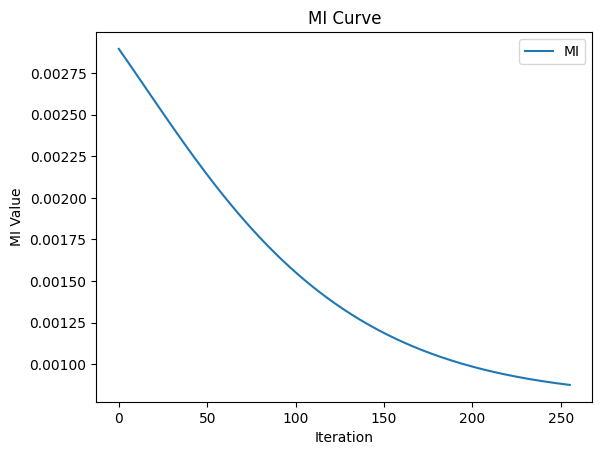

In [40]:
import matplotlib.pyplot as plt

# 假设你的list数据是这样的

# 创建x轴的坐标，假设x轴是从0到len(data)-1
x = range(len(all_I))
#print((all_I))
# 绘制曲线图
plt.plot(x, all_I, label='MI')

# 添加标题和坐标轴标签
plt.title('MI Curve')
plt.xlabel('Iteration')
plt.ylabel('MI Value')

# 添加图例
plt.legend()

# 显示图形
plt.show()

In [43]:
np.set_printoptions(precision=5, suppress=True)

# 打印数据
#print(data)
print(P_Y)

[0.29343 0.67555 0.01921 0.00246 0.00361 0.00554 0.00011 0.00008]
